<a href="https://colab.research.google.com/github/Bhagyashree-Bhattacharyya/Statistics/blob/main/PredictiveModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


***LINEAR REGRESSION***

Fabrication of a relation of a webpage speed & amount purchased

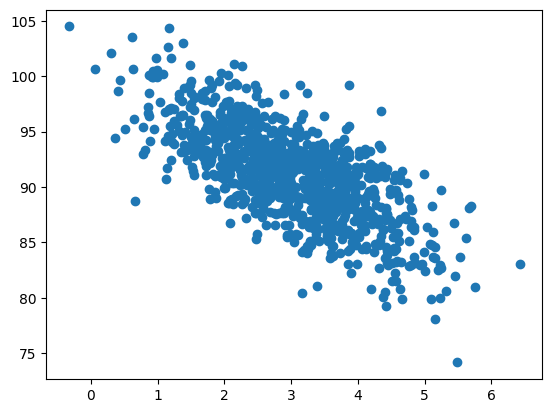

In [6]:
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 1.0, 1000))*3  # some random relation

plt.scatter(pageSpeeds, purchaseAmount)

In [7]:
from scipy import stats

slope, intercept, r_value, p_value, std_error = stats.linregress(pageSpeeds, purchaseAmount)

In [8]:
# r square
r_value**2

0.49691970057941853

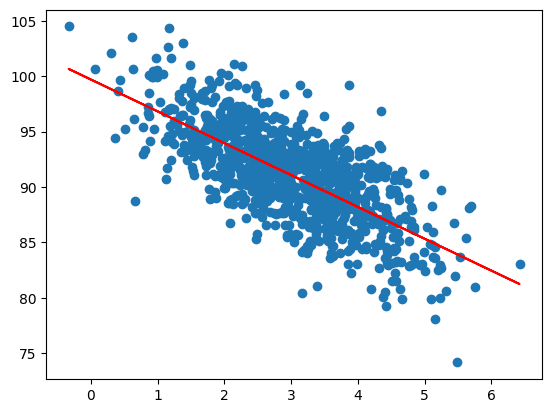

In [9]:
def predict(x):
  return slope*x + intercept

fitLine = predict(pageSpeeds)
plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')
plt.show()

***POLYNOMIAL REGRESSION***

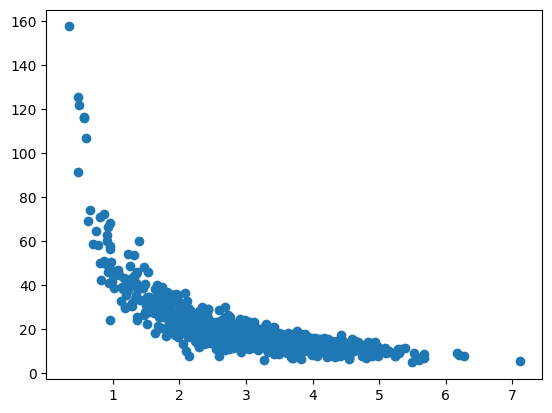

In [10]:
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)/pageSpeeds

plt.scatter(pageSpeeds, purchaseAmount)

In [12]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4))

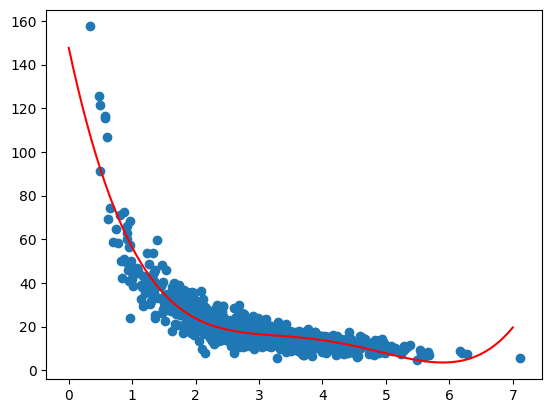

In [14]:
xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [16]:
from sklearn.metrics import r2_score
r2 = r2_score(y, p4(x))
print (r2)

0.8293766396303073


***MULTIPLE REGRESSION***

In [17]:
import pandas as pd
df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


<Axes: xlabel='Mileage'>

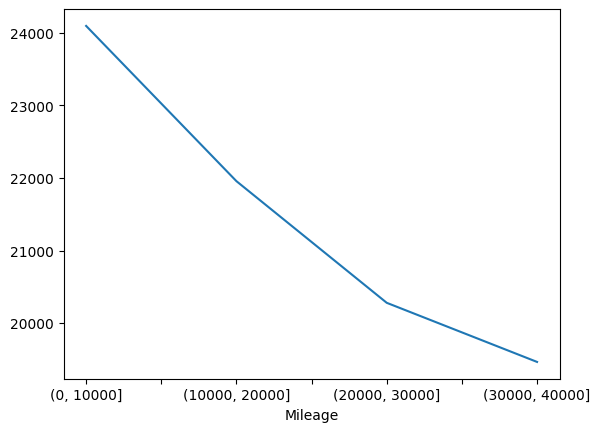

In [19]:
%matplotlib inline
import numpy as np
df1=df[['Mileage', 'Price']]
bins = np.arange(0, 50000, 10000)
groups = df1.groupby(pd.cut(df1['Mileage'], bins)).mean()
print(groups.head())
groups['Price'].plot.line()

In [20]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']

X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)

# a constant column as Y-intercept
X = sm.add_constant(X)

print(X)

     const   Mileage  Cylinder     Doors
0      1.0 -1.417485   0.52741  0.556279
1      1.0 -1.305902   0.52741  0.556279
2      1.0 -0.810128   0.52741  0.556279
3      1.0 -0.426058   0.52741  0.556279
4      1.0  0.000008   0.52741  0.556279
..     ...       ...       ...       ...
799    1.0 -0.439853   0.52741  0.556279
800    1.0 -0.089966   0.52741  0.556279
801    1.0  0.079605   0.52741  0.556279
802    1.0  0.750446   0.52741  0.556279
803    1.0  1.932565   0.52741  0.556279

[804 rows x 4 columns]


<ipython-input-20-18ab7d0fb680>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)


In [21]:
est = sm.OLS(y, X).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     150.0
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           3.95e-77
Time:                        08:39:00   Log-Likelihood:                -8356.7
No. Observations:                 804   AIC:                         1.672e+04
Df Residuals:                     800   BIC:                         1.674e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.134e+04    279.405     76.388      0.0

In [22]:
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

In [24]:
scaled = scale.transform([[45000, 8, 4]])
scaled = np.insert(scaled[0], 0, 1)
print(scaled)

[1.         3.07256589 1.96971667 0.55627894]


In [25]:
predicted = est.predict(scaled)
print(predicted)

[27658.15707316]
